In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import sys
sys.path.append('../')
from Core_Functions import neural_networks

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images = train_images.reshape((60000, 28,28, 1))
train_images = train_images.astype('float32')/ 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
model = neural_networks.build_CNN((28,28,1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [16]:
# Perform k-fold cross-validation to understand the optimal number of epochs to train on
k = 4
num_val_samples = len(train_images)//k

num_epochs = 50

all_val_mae_histories = []
all_train_mae_histories = []

all_val_acc_histories = []
all_train_acc_histories = []

for i in range(k):
    
    print('processing fold #', i)
    val_data = train_images[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_images[:i * num_val_samples],
    train_images[(i+1) * num_val_samples:]],
    axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_labels[:i*num_val_samples],
    train_labels[(i+1)*num_val_samples:]],
    axis = 0)
    
    model = neural_networks.build_CNN((28,28,1))
    history = model.fit(partial_train_data,
              partial_train_targets,
              validation_data = (val_data, val_targets),
              epochs = num_epochs,
              batch_size = 64,
              verbose = 0)
    
    val_mae_history = history.history['val_mae']
    all_val_mae_histories.append(val_mae_history)
    
    train_mae_history = history.history['mae']
    all_train_mae_histories.append(train_mae_history)
    
    val_acc_history = history.history['val_accuracy']
    all_val_acc_histories.append(val_acc_history)
    
    train_acc_history = history.history['accuracy']
    all_train_acc_histories.append(train_acc_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


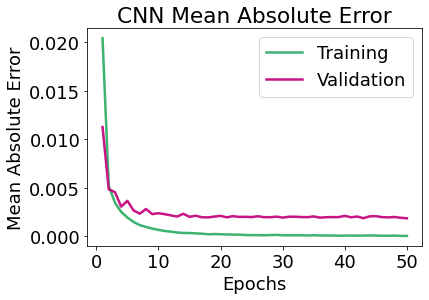

In [17]:
# Compute the average of the per-epoch MAE scores for all folds
# Building the history of successive mean K-fold validation scores

average_val_mae_history = [
    np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

average_train_mae_history = [
    np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_train_mae_history) + 1), average_train_mae_history, label = 'Training', c ='mediumseagreen', lw=2.5)
plt.plot(range(1, len(average_val_mae_history) + 1), average_val_mae_history, label='Validation', c = 'mediumvioletred', lw=2.5)

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('CNN Mean Absolute Error')
plt.savefig('Q0_Figures/Q0_CNN_MAE.png', dpi = 400, bbox_inches="tight")

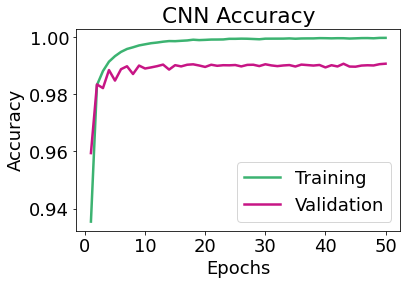

In [18]:
# Compute the average of the per-epoch Accuracy scores for all folds
# Building the history of successive mean K-fold validation scores

average_val_acc_history = [
    np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

average_train_acc_history = [
    np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_train_acc_history) + 1), average_train_acc_history, label = 'Training', c ='mediumseagreen', lw=2.5)
plt.plot(range(1, len(average_val_acc_history) + 1), average_val_acc_history, label='Validation', c = 'mediumvioletred', lw=2.5)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.title('CNN Accuracy')
plt.savefig('Q0_Figures/Q0_CNN_Accuracy.png', dpi = 400, bbox_inches="tight")

In [19]:
# Rebuild the model and train on full dataset (60k) rather than splitting it (48k)
# Do this for the optimal number of epochs
    # It seems like around 20 epochs the validation MAE and Accuracy flatten, so this will be used
model = neural_networks.build_CNN((28,28,1))
model.fit(train_images, train_labels, epochs = 20, batch_size = 64)

Epoch 1/20
938/938 [==============================] - 21s 22ms/step - loss: 0.1717 - accuracy: 0.9462 - mae: 0.0168
Epoch 2/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0480 - accuracy: 0.9853 - mae: 0.0045
Epoch 3/20
938/938 [==============================] - 21s 22ms/step - loss: 0.0325 - accuracy: 0.9896 - mae: 0.0030
Epoch 4/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0256 - accuracy: 0.9922 - mae: 0.0022
Epoch 5/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0197 - accuracy: 0.9939 - mae: 0.0017
Epoch 6/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0156 - accuracy: 0.9952 - mae: 0.0013
Epoch 7/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0140 - accuracy: 0.9959 - mae: 0.0011
Epoch 8/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0111 - accuracy: 0.9967 - mae: 9.2991e-04
Epoch 9/20
938/938 [==============================] - 21s 22ms/step 

In [20]:
test = model.evaluate(test_images, test_labels)
test

313/313 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9918 - mae: 0.0017


[0.06221252307295799, 0.9918000102043152, 0.001663676812313497]

In [21]:
# Serialize model to JSON
model_json = model.to_json()
with open("Q0_Trained_Models/Q0_CNN_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Q0_Trained_Models/Q0_CNN_Model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets
